# Video Games Project

## Introduction

In this project, we will analyze the data of an online store that sells video games all around the world. The data contain users and experts reviews, genres, platforms (e.g. Xbox or PlayStation), and so on. The main goal of this project is to identify patterns that determine whether a game succeeds or not, which will help to spot potential games and recommend the store the best advertising campaign.

###  Opening the data file and study the general information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import sidetable
import numpy as np
from scipy import stats as st
from scipy.stats import levene

In [2]:
data = pd.read_csv('games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


So here we see that we have 16,715 rows and 11 columns. An important notice is that the User_score column is of object type because it contains the value 'tbd' which is a string. We also see that we have parameters with missing values. Let's check that out.

In [4]:
data.stb.missing(style = True)

,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%


We have 6 columns with missing values:
1. Critic_Score
2. Rating
3. User_Score
4. Year_of_Release
5. Name
6. Genre

In step 2 we will decise what is the right way of action for each parameter. 

In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Here we see that the average sales of each region varies, when the highest average is in north america and the smallest is in other countries. 

Now let's check the categorical variables.

In [6]:
data.describe(include = ['object'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [7]:
len(data.query('User_Score == "tbd"'))

2424

Here we see that the most common game is **Need for Speed: Most Wanted**, the most common platform is PS2, the most common genre is Action, the most common user score is tbd (to be determined) and the most common rating is E.

We also see that we have a lot of games, only 31 platforms, 12 genres, a variety of users scores, and only 8 rating points.

Interesting. It seems that there is a demand for actions games. I guess that action and adrenalin increase sales.😎


Let's continue to the next stage💪

### Preparing the data

**Replacin the column names (make them lowercase)**

In [8]:
data.columns=data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Converting the data to the required types**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


We will convert the following column:

**year_of_release** - From float to integer. A year of release is a whole number and not a decimal. To do so we will drop the missing values which are only 1.61% of the total values. This way the NaN values will not interfere us using the astype method().

In [10]:
data= data.dropna(subset=['year_of_release'])
data['year_of_release'] = data['year_of_release'].astype(int)
data.head()

/var/folders/k9/cpbrcq212118hlkygx_jfkhc0000gp/T/ipykernel_7321/499615839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_of_release'] = data['year_of_release'].astype(int)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
data.stb.missing(style = True)

,missing,total,percent
critic_score,"8,463","16,446",51.46%
rating,"6,678","16,446",40.61%
user_score,"6,607","16,446",40.17%
name,2,"16,446",0.01%
genre,2,"16,446",0.01%
platform,0,"16,446",0.00%
year_of_release,0,"16,446",0.00%
na_sales,0,"16,446",0.00%
eu_sales,0,"16,446",0.00%
jp_sales,0,"16,446",0.00%


Looking great!

**Missing values**

Let's look again at the miising values with the help of the missing() method.

In [12]:
data.stb.missing(style = True)

,missing,total,percent
critic_score,"8,463","16,446",51.46%
rating,"6,678","16,446",40.61%
user_score,"6,607","16,446",40.17%
name,2,"16,446",0.01%
genre,2,"16,446",0.01%
platform,0,"16,446",0.00%
year_of_release,0,"16,446",0.00%
na_sales,0,"16,446",0.00%
eu_sales,0,"16,446",0.00%
jp_sales,0,"16,446",0.00%


All the review variables: **critic_score, rating, and user_score** have a big percentage of missing values. This can be due  that the customers didn't return a review on the game. Not many people submit a review **after** buying a game (or anything else).

Due to the big amount of missing values in these 3 columns, and the inability to know the true reason for it and to resotore them, we will decide to not to tuch them and leave them as they are. They are important and contain value information on their own.

Regarding the value **tbd** in the user_score column, we will replace it with NaN value (because 'to be determined' means that the game have not yet had the rating, so NaN is suitable equivalent).

In the rating column, we will replace the NaN values with the marker value **unknown**. 

**user_score**
***

In [13]:
data['user_score_new'] = data['user_score'].replace('tbd', np.nan)
data.head()

/var/folders/k9/cpbrcq212118hlkygx_jfkhc0000gp/T/ipykernel_7321/986577491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['user_score_new'] = data['user_score'].replace('tbd', np.nan)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_new
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,8
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,8.3
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,8
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN


In [14]:
data[data['user_score_new'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_new


In [15]:
data.stb.missing(style = True)

,missing,total,percent
user_score_new,"8,983","16,446",54.62%
critic_score,"8,463","16,446",51.46%
rating,"6,678","16,446",40.61%
user_score,"6,607","16,446",40.17%
name,2,"16,446",0.01%
genre,2,"16,446",0.01%
platform,0,"16,446",0.00%
year_of_release,0,"16,446",0.00%
na_sales,0,"16,446",0.00%
eu_sales,0,"16,446",0.00%


Great!

converting the 'tbd' values worked. 

Let's go on.🤙

**rating**
***

In [16]:
data['rating_new'] = data['rating'].fillna('unknown')
data.head()

/var/folders/k9/cpbrcq212118hlkygx_jfkhc0000gp/T/ipykernel_7321/2909187712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating_new'] = data['rating'].fillna('unknown')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_new,rating_new
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,unknown


Looking good!

**Calculating the total sales (the sum of sales in all regions) for each game in a separate column**

In [17]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)
data.head()

/var/folders/k9/cpbrcq212118hlkygx_jfkhc0000gp/T/ipykernel_7321/2562586363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_new,rating_new,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,unknown,31.38


**Summary**

This step contained the following actions:
1. Converting the data type of the **year_of_release** column to integer and dropping its missing values. 


2. Leaving the missing values of the 3 columns as it is with the following adjustments:
* **user_score** - we converted the 'tbd' values to NaN
* **rating** - we converted the NaN values to the mark value unknown

Let's move on to the third step.🤘

###  Analyzing the data

**Task 1:**

**How many games were released in different years. Is the data for every period significant?**

To answer these questions, we will build **Lollipop Chart**. 

First, we will create data set that contains the number of games that were released every year, remove the years that their value is 0, and then plot the chart. 

In [18]:
df_games_years = data[['year_of_release', 'name']]
df_games_years_clean = df_games_years[df_games_years['year_of_release'] != 0]
df_num_games_years = df_games_years_clean.groupby('year_of_release').count().sort_values(
by = 'year_of_release').reset_index()
df_num_games_years.head()

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


Looking great. 👌 

Now for the fun part - plotting the lollipop chart.

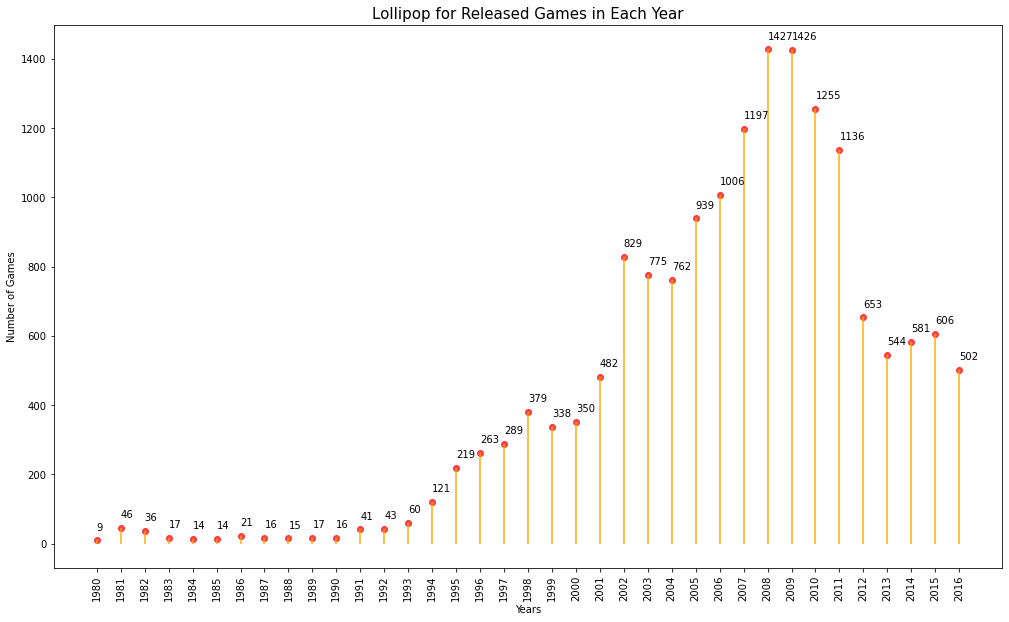

In [19]:
fig, ax = plt.subplots(figsize = (17,10))

ax.vlines(x= df_num_games_years['year_of_release'], ymin= 0, ymax= df_num_games_years['name'],
         color= 'orange', alpha= 0.7, linewidth= 2)

ax.scatter(x= df_num_games_years['year_of_release'], y =df_num_games_years['name'],
          color= 'red', alpha= 0.7)

ax.set_title('Lollipop for Released Games in Each Year', fontdict= {'size':15})

ax.set_ylabel('Number of Games')

ax.set_xlabel('Years')

ax.set_xticks(df_num_games_years['year_of_release'])

ax.set_xticklabels(df_num_games_years['year_of_release'], rotation= 90)

for row in df_num_games_years.itertuples():
    ax.text(row.year_of_release, row.name+30,
             s= round(row.name, 2))

The graph shows us that in the first half of the 90s games were not so popular, and only after 1994 did the number of released games starts to increase significantly when the peak was in 2008. After 2008, we see a decrease in the number of released games, which makes sense, because 2008 was the big financial crisis.  

**Task 2:**

**Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?**

First, we will create a data set that contains the total sales of each platform.

In [20]:
df_platform_total_sales = data[['platform','total_sales']]
df_platform_sales_clean = df_platform_total_sales.groupby('platform').sum().sort_values(
by='total_sales').reset_index()
df_platform_sales_clean.head()

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42


In [21]:
df_platform_sales_clean.tail()

,platform,total_sales
26,DS,802.78
27,Wii,891.18
28,PS3,931.34
29,X360,961.24
30,PS2,1233.56


We see that there is a very large deviation in the data, between almost zeros and hundreds of dollars(?). To overcome that we will create a z-score parameter, which divides the platforms that had income above the average and below the average. The z-score will measure how far the value is from the average in std. We chose the std to be our 'foot' measure because, by the rules of statistics, 99% of the data falls in the range of {-3std, +3std}, therfore it's logical to measure the distance of the values from the average with std 'steps'. 

In [22]:
df_platform_sales_clean['z_score']= (
    df_platform_sales_clean['total_sales'] - df_platform_sales_clean['total_sales'].mean())/df_platform_sales_clean['total_sales'].std()
df_platform_sales_clean.head()

,platform,total_sales,z_score
0,PCFX,0.03,-0.826947
1,GG,0.04,-0.826918
2,3DO,0.10,-0.826744
3,TG16,0.16,-0.826569
4,WS,1.42,-0.822906


A positive z _score means that the total sales are **above** the average. 

A negative z _score means that the total sales are **beneath** the average.

Now we will create a new color column for our positive and negative z_scores:
* **Green** - for the positive z_scores
* **Red** - for the negative z_scores


In [23]:
df_platform_sales_clean['color']= ['red' if x<0 else 'green' for x in df_platform_sales_clean.z_score]
df_platform_sales_clean.head()

,platform,total_sales,z_score,color
0,PCFX,0.03,-0.826947,red
1,GG,0.04,-0.826918,red
2,3DO,0.10,-0.826744,red
3,TG16,0.16,-0.826569,red
4,WS,1.42,-0.822906,red


In [24]:
df_platform_sales_clean.tail()

,platform,total_sales,z_score,color
26,DS,802.78,1.507345,green
27,Wii,891.18,1.764401,green
28,PS3,931.34,1.881181,green
29,X360,961.24,1.968126,green
30,PS2,1233.56,2.759997,green


Looking good. 

Now let's build a distribution to the platforms with the biggest sales by plotting diversion bar plot.

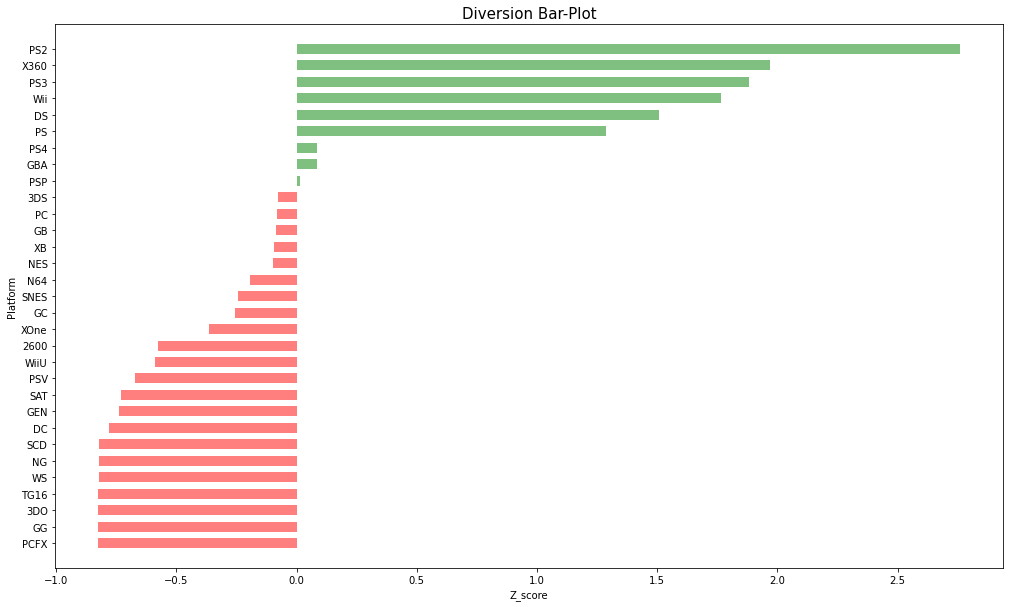

In [25]:
fig, ax = plt.subplots(figsize = (17,10))

ax.set_title('Diversion Bar-Plot', fontdict= {'size':15})

ax.set_ylabel('Platform')

ax.set_xlabel('Z_score')
plt.hlines(y= df_platform_sales_clean['platform'], xmax = df_platform_sales_clean['z_score'], 
          xmin= 0, color=df_platform_sales_clean['color'], alpha= 0.5, linewidth= 10  )
plt.show()

Now let's find platforms that used to be popular but now have no revenues, and also determine how long does it take for new platforms to appear and old ones to fade. 😎

First, we will create a data set with years and platforms and then plot a whole data set for each platform with lineplot() method. 

In [26]:
yesrs_plt_sales = data[['year_of_release','platform', 'total_sales']]
yesrs_plt_sales.head()

,year_of_release,platform,total_sales
0,2006,Wii,82.54
1,1985,NES,40.24
2,2008,Wii,35.52
3,2009,Wii,32.77
4,1996,GB,31.38


In [27]:
year_plat = pd.pivot_table(data, index = "year_of_release", columns= "platform",
                      values = "total_sales", aggfunc = 'sum')
year_plat.head()

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looking great!

Now let's plot!🤘

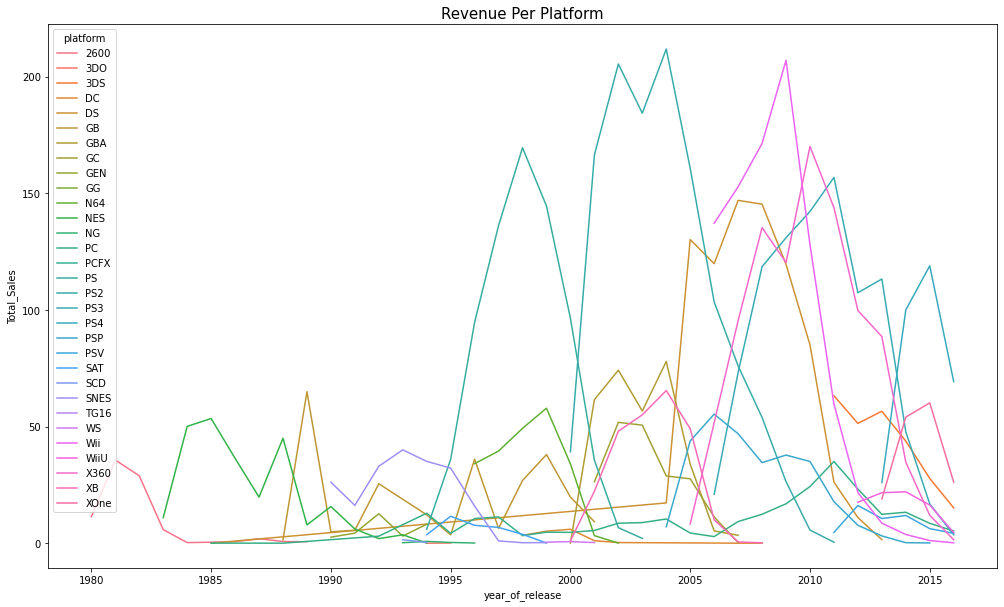

In [28]:
fig, ax = plt.subplots(figsize = (17,10))

ax.set_title('Revenue Per Platform', fontdict= {'size':15})

ax.set_ylabel('Total_Sales')

sns.lineplot(data=year_plat, dashes=False) 

plt.show()

So here we see that the platforms live in total around 10 years when they are starting to die about 5 years after they were released.
We can say that in general, it takes 5 years for the platform to appear and also to fade away. For our analysis, we will take a smaller period so the analysis will not be skewed and include a lagging trend. 

**Task 3:** 

**Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.**

According to the findings of the previous question, we will take a 3 years period of time. Therefore to give a prediction for 2017, we only need data that is from the year 2014.

Let's create the relevant data set.🤙

In [29]:
data_2014 = data[data['year_of_release'] >= 2014]
data_2014.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_new,rating_new,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,NaN,unknown,7.98


**Task 4:** 

**Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.**

For that, we will use the relevant data that we have set above and create a heat map.

In [30]:
df = pd.pivot_table(data_2014, index = 'year_of_release', columns = 'platform', values = 'total_sales',
                   aggfunc = 'sum', fill_value=0)
df.head()

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


Now we will use the shift() method.

In [31]:
(df - df.shift(+1)).tail()

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,-15.98,-4.76,-30.94,18.90,-0.12,-5.65,-2.61,-5.68,-22.78,6.07
2016,-12.64,-3.27,-13.22,-49.65,-0.12,-2.00,-0.96,-11.75,-10.44,-33.99


Let's make it easier for the eye.🤗

In [32]:
df_t = (df - df.shift(+1)).T
df_t 

year_of_release,2014,2015,2016
platform,,,
3DS,NaN,-15.98,-12.64
PC,NaN,-4.76,-3.27
PS3,NaN,-30.94,-13.22
PS4,NaN,18.90,-49.65
PSP,NaN,-0.12,-0.12
PSV,NaN,-5.65,-2.00
Wii,NaN,-2.61,-0.96
WiiU,NaN,-5.68,-11.75
X360,NaN,-22.78,-10.44


Now let's create the heatmap.🔥

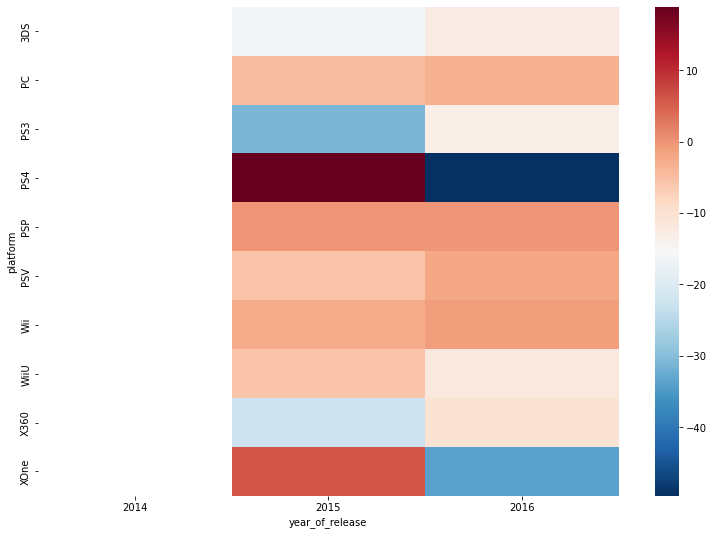

In [33]:
plt.figure(figsize=(13,9))
sns.heatmap(df_t, cmap = 'RdBu_r')
plt.show()

We can see in the heatmap that these are the two platforms that remained profitable:
1. PSP
2. Wii 

We can see that PSP is stable and Wii increasing sales over the years so it's worth investing in advertising these platforms. All the other platforms are not profitable and therefore don't worth investing resources to promote them in the store. 

**Task 5:** 

**Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.**

Let's build the correct data set for this task.

In [34]:
grouped= data_2014.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
grouped.head()

,platform,year_of_release,total_sales
0,3DS,2014,43.76
1,3DS,2015,27.78
2,3DS,2016,15.14
3,PC,2014,13.28
4,PC,2015,8.52


In [35]:
grouped_mean= data_2014.groupby(['platform','year_of_release'])['total_sales'].mean().reset_index()
grouped_mean.head()

,platform,year_of_release,total_sales
0,3DS,2014,0.547000
1,3DS,2015,0.323023
2,3DS,2016,0.329130
3,PC,2014,0.282553
4,PC,2015,0.170400


Now we will plot the box plot when the boxes are sorted by revenue. 

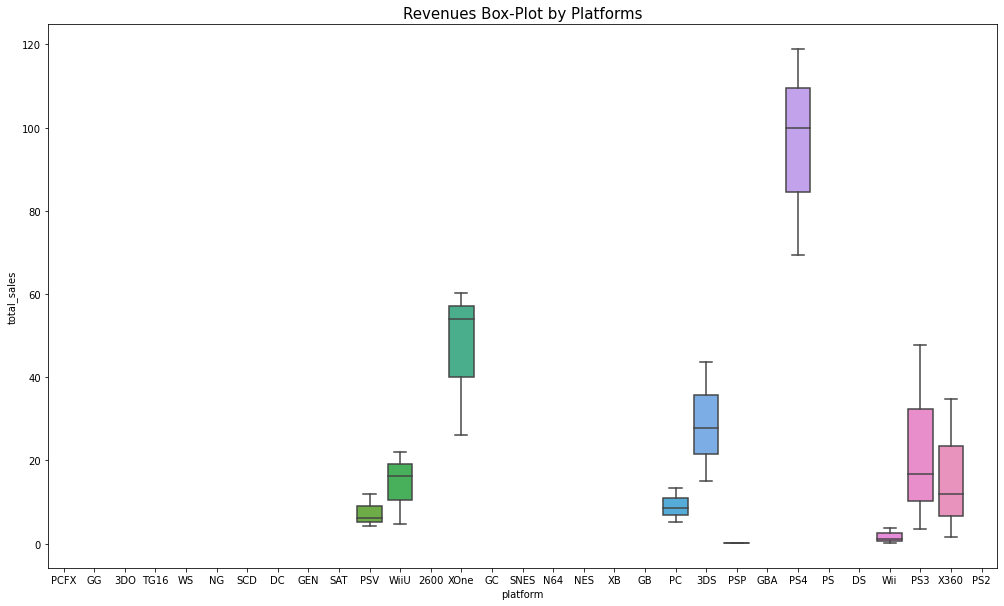

In [36]:
order = df_platform_sales_clean['platform']
fig, ax = plt.subplots(figsize = (17,10))
ax.set_title('Revenues Box-Plot by Platforms', fontdict= {'size':15})

sns.boxplot(x= 'platform', y = 'total_sales', data = grouped, order= order)

plt.show()

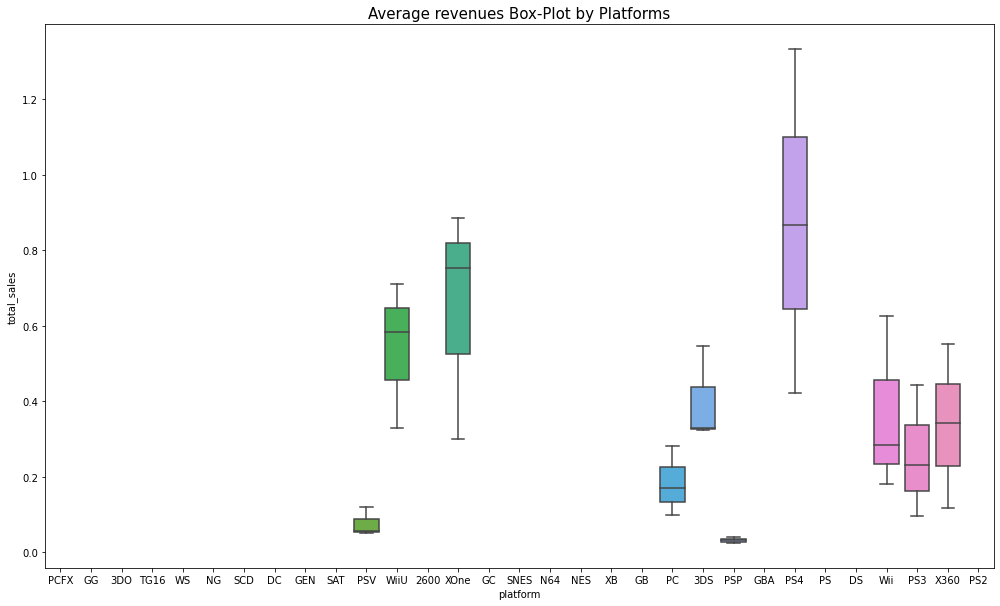

In [37]:
fig, ax = plt.subplots(figsize = (17,10))
ax.set_title('Average revenues Box-Plot by Platforms', fontdict= {'size':15})

sns.boxplot(x= 'platform', y = 'total_sales', data = grouped_mean, order= order)

plt.show()

We see that PS4 platform is a true leader of the revenues, and after it the PS3, X360 and Wii platforms. 

**Task 6:** 

**Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.**

For this task, we will choose the **PS4** platform.✌️

We will create a function that builds a scatter and hexbin plots and also checks the correlation between the reviews and sales. 

In [38]:
def score_effect_sales (platform, score_type):
    data_func = data_2014[data_2014['platform'] == platform][[score_type, 'total_sales']]
    
    if score_type == 'user_score_new':
        data_func['user_score_new'] = np.floor(pd.to_numeric(data_func['user_score_new'], errors='coerce')).astype(float)
    
    
    #Building a scatter-plot and hexbin plot
    data_func.plot(x= score_type, y= 'total_sales', kind= 'scatter', figsize= (14,10),
                  color = 'green', title= 'Scatter-plot' )
    
    plt.xlabel('Score')
    plt.ylabel('Total Sales')
    
    data_func.plot(x= score_type, y= 'total_sales', kind= 'hexbin', figsize= (14,10),
                  color = 'green', sharex = False, gridsize = 15, title= 'Hexbin-plot')
    
    plt.xlabel('Score')
    plt.ylabel('Total Sales')
    
    plt.show()
    
     #Finding the correlation between the parameters
    corr= data_func[score_type].corr(data_func['total_sales'])
    
    if score_type == 'user_score_new':
        score_type = 'user reviews'
    else:
        score_type = 'professional reviews'
        
    
    if corr > 0.7:
        print('Positive correlation between', score_type, 'and', platform, 'revenues.')
    else:
        print('Weak correlation between', score_type, 'and', platform, 'revenues.')
    

Let's check how user critics affect the PS4 revenues. 

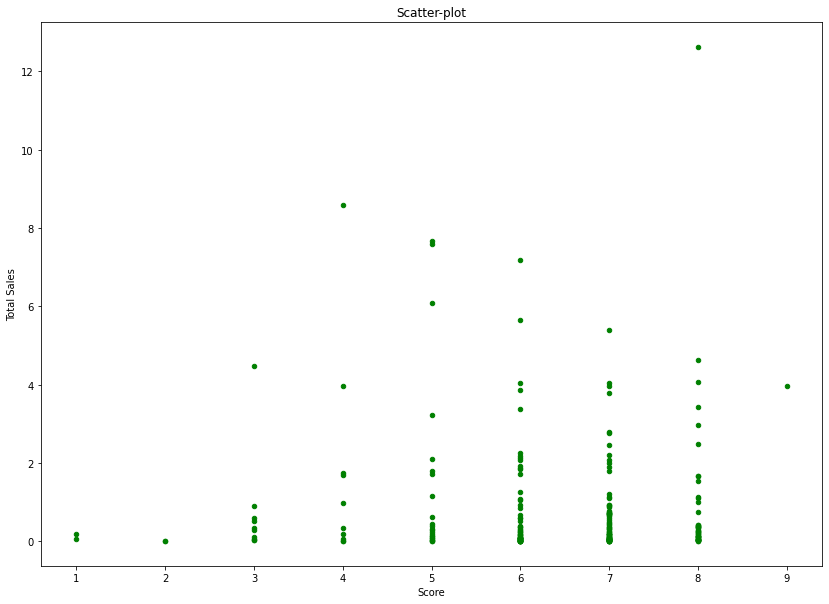

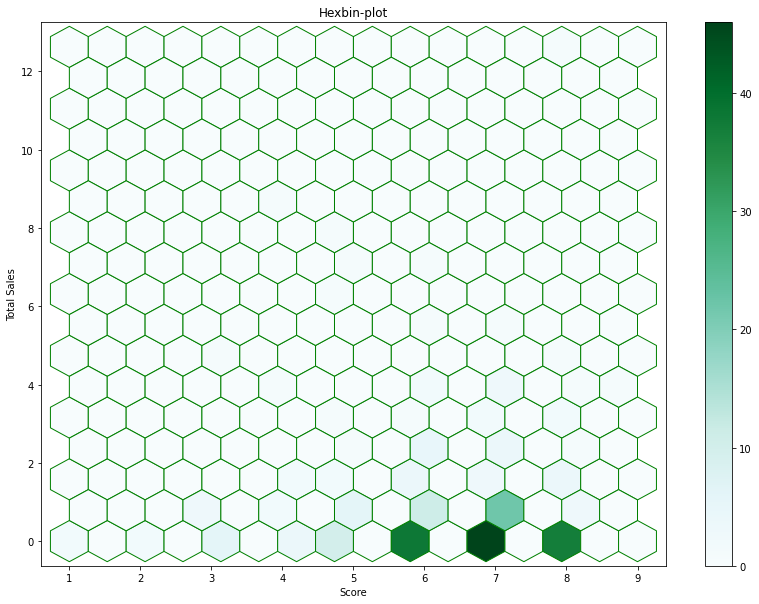

Weak correlation between user reviews and PS4 revenues.


In [39]:
score_effect_sales ('PS4', 'user_score_new')

Now let's check how professional critics affect the PS4 revenues.

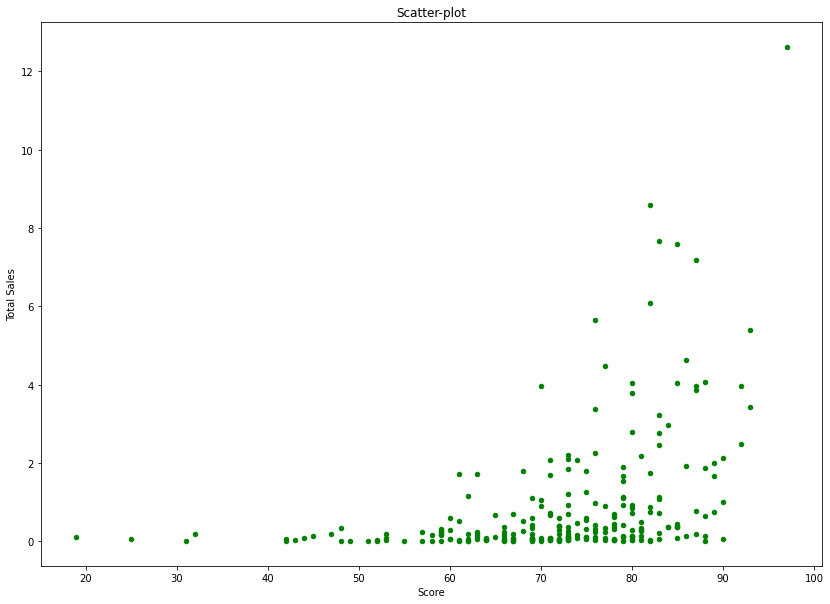

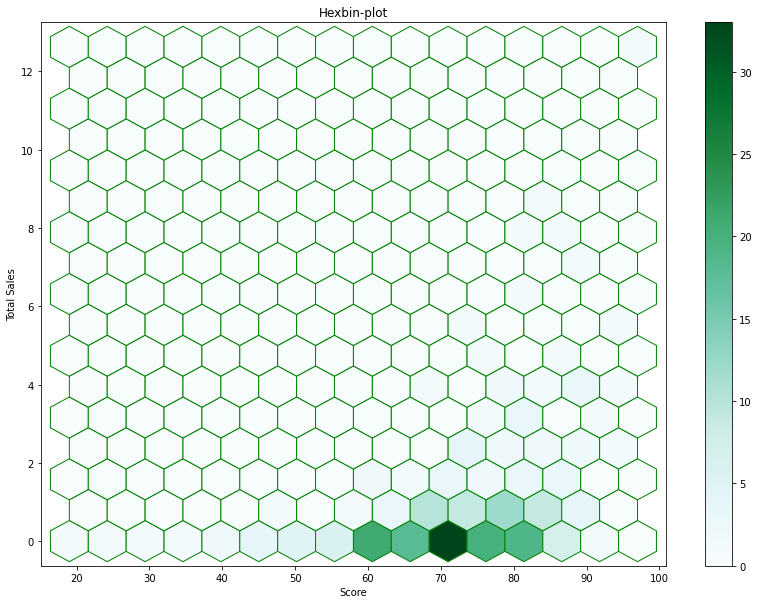

Weak correlation between professional reviews and PS4 revenues.


In [40]:
score_effect_sales ('PS4', 'critic_score')

Tthe output tells us that there is a weak connection between any kind of review and revenue. The influence of both professional critics and 'usual' users critic on the revenue is weak. 

**Task 7:** 

**Keeping your conclusions in mind, compare the sales of the same games on other platforms.**

First, we will make a list of our top platforms in the relevant data set, and then use the function that we built earlier to iterate among platforms to compare the sales.

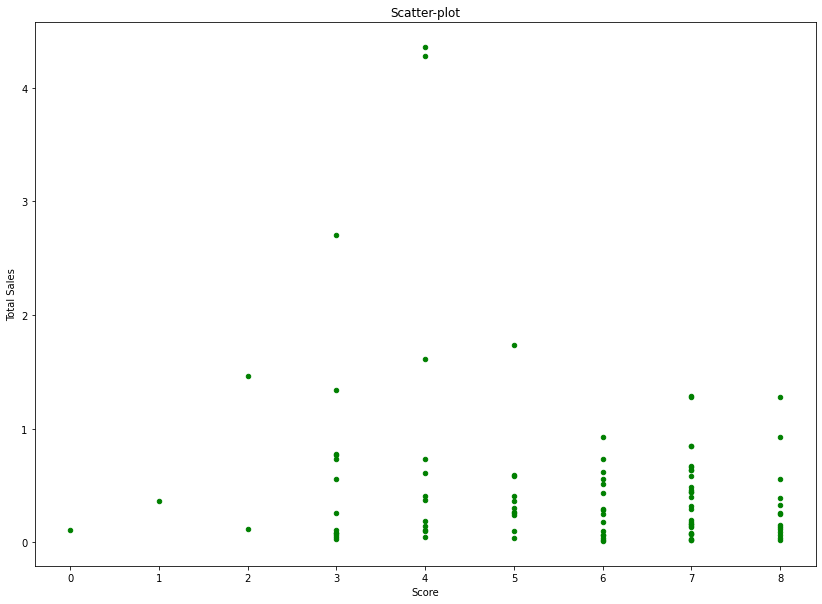

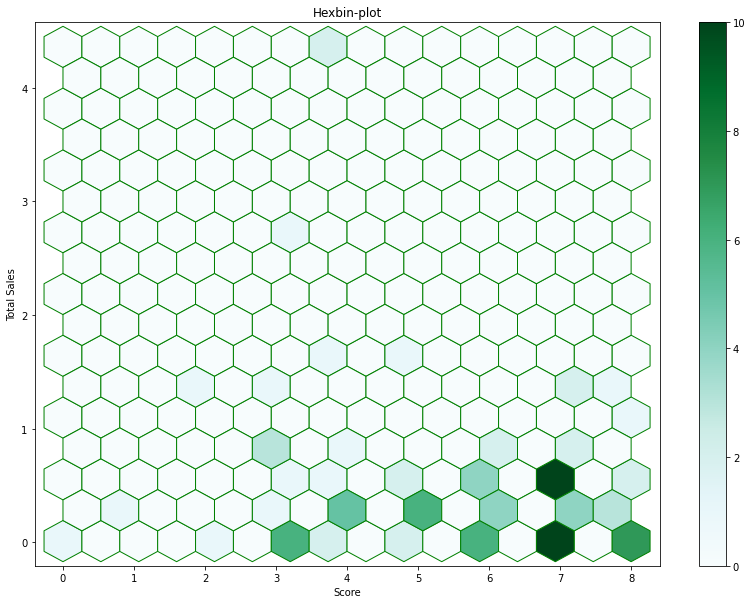

Weak correlation between user reviews and PS3 revenues.


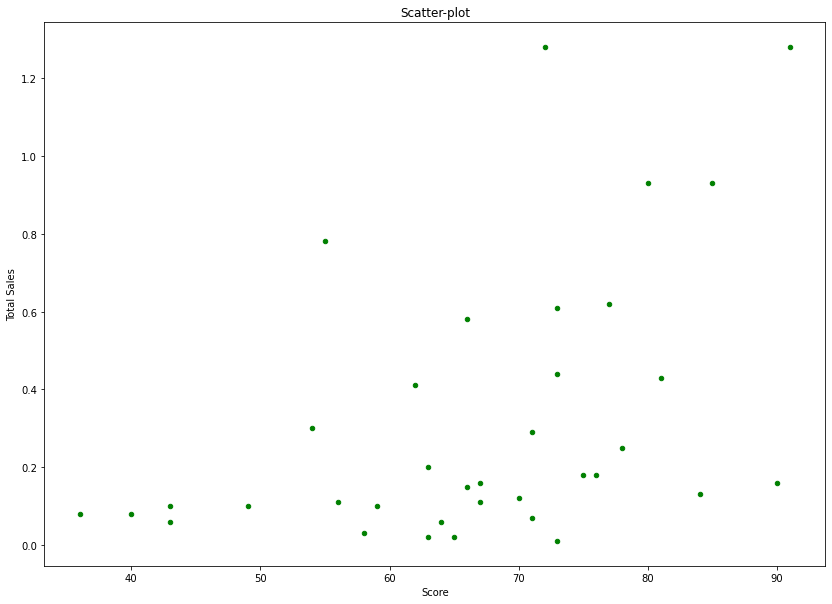

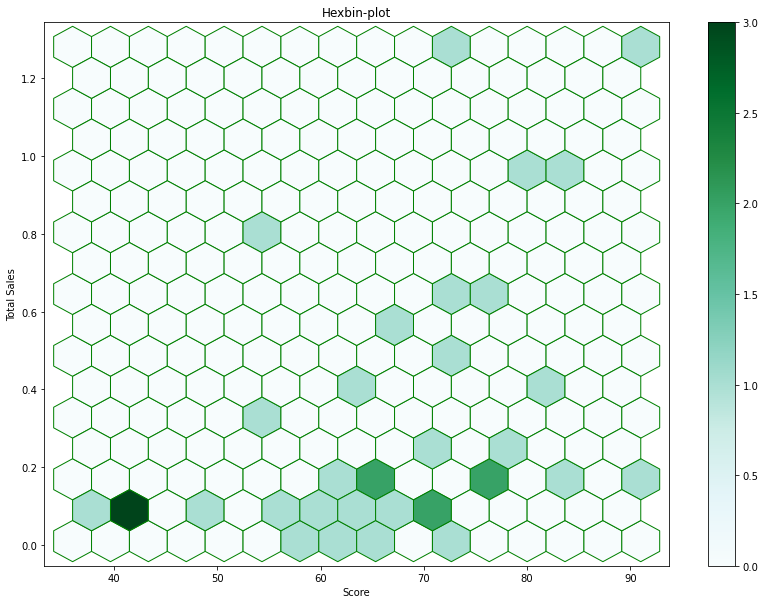

Weak correlation between professional reviews and PS3 revenues.


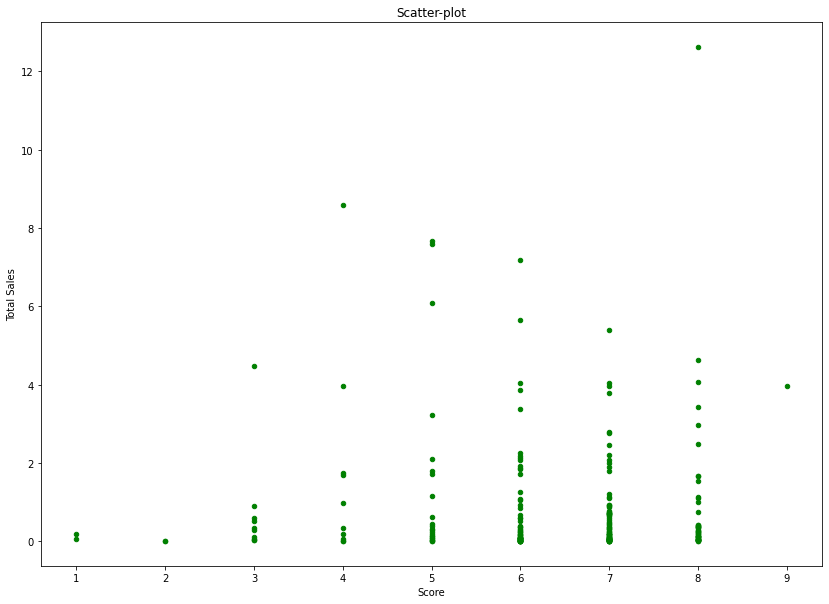

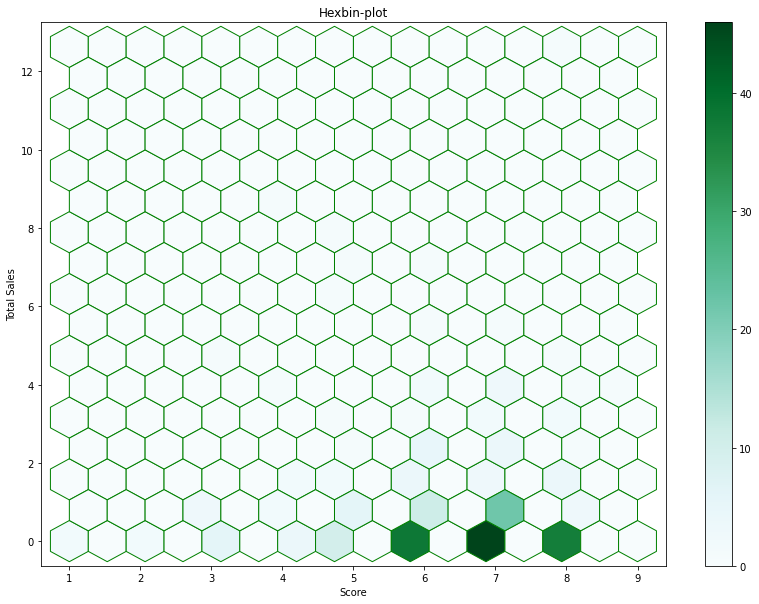

Weak correlation between user reviews and PS4 revenues.


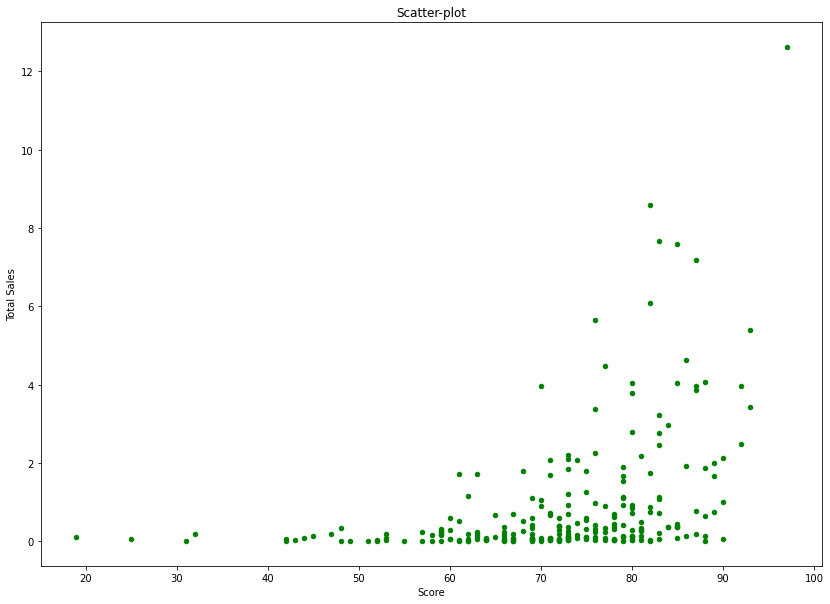

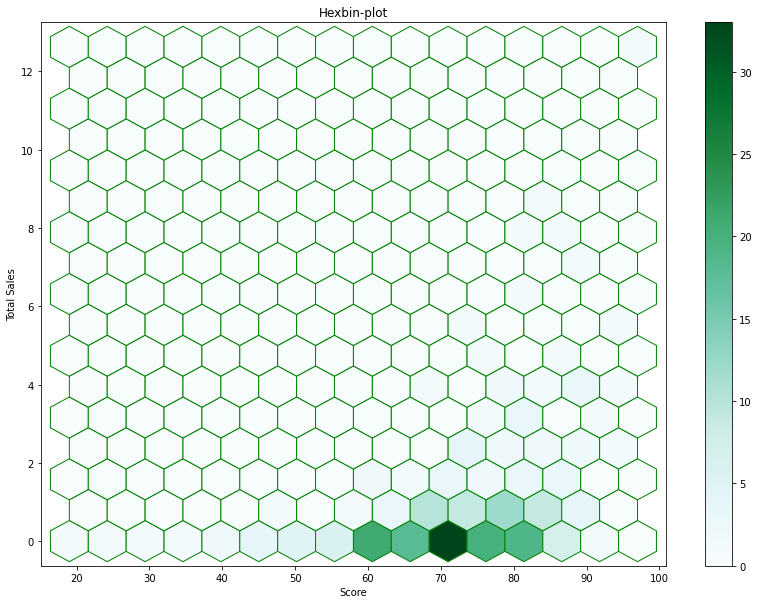

Weak correlation between professional reviews and PS4 revenues.


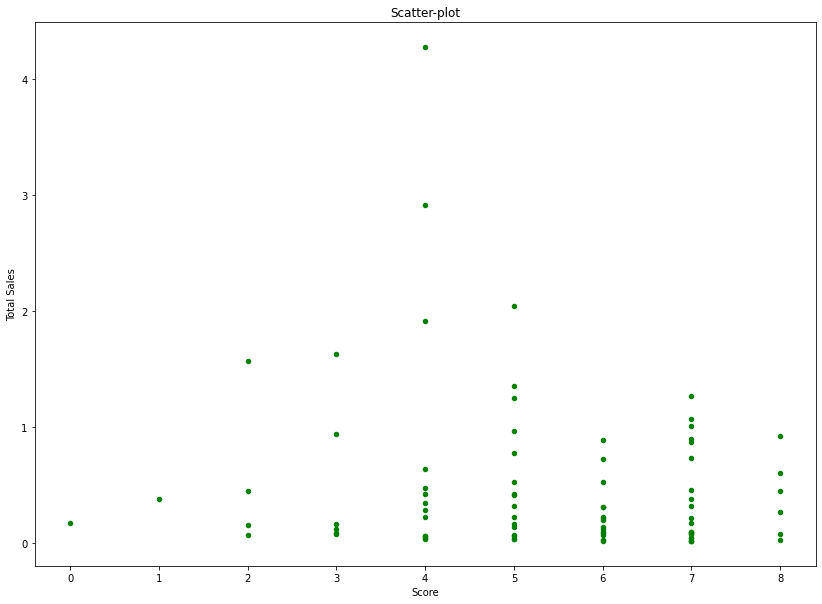

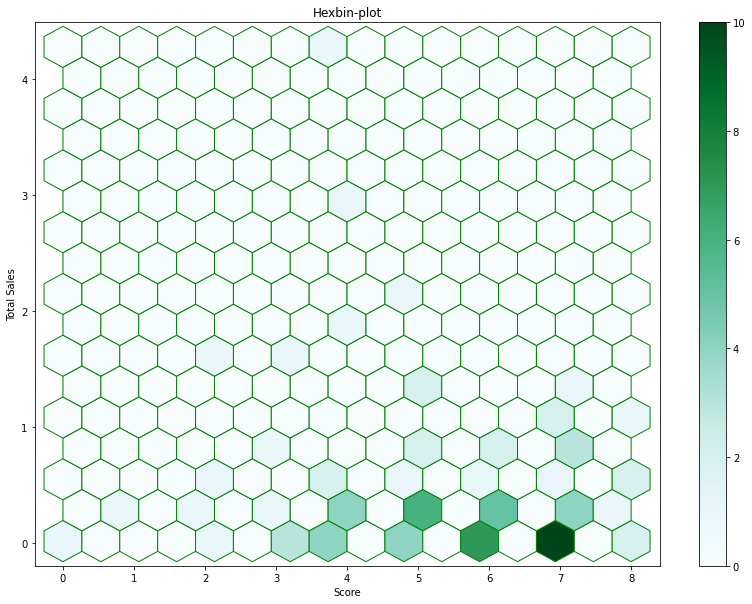

Weak correlation between user reviews and X360 revenues.


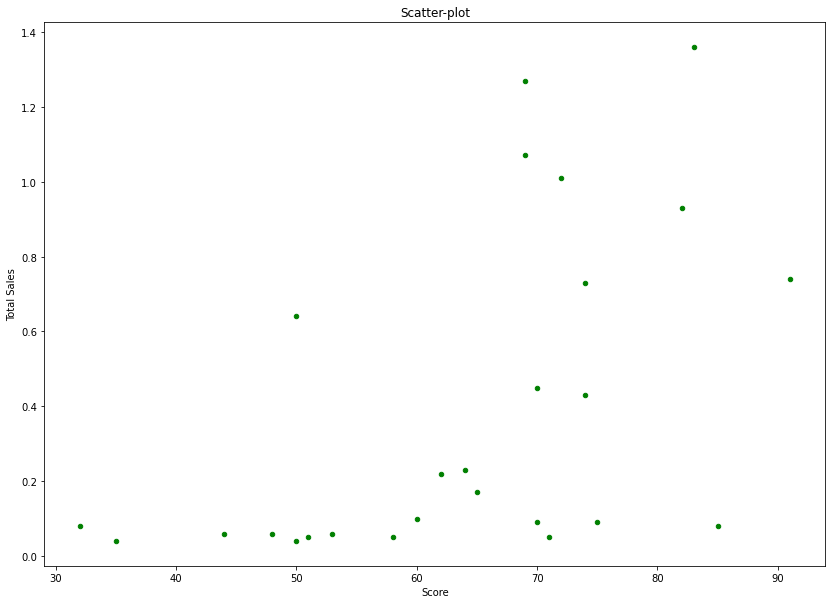

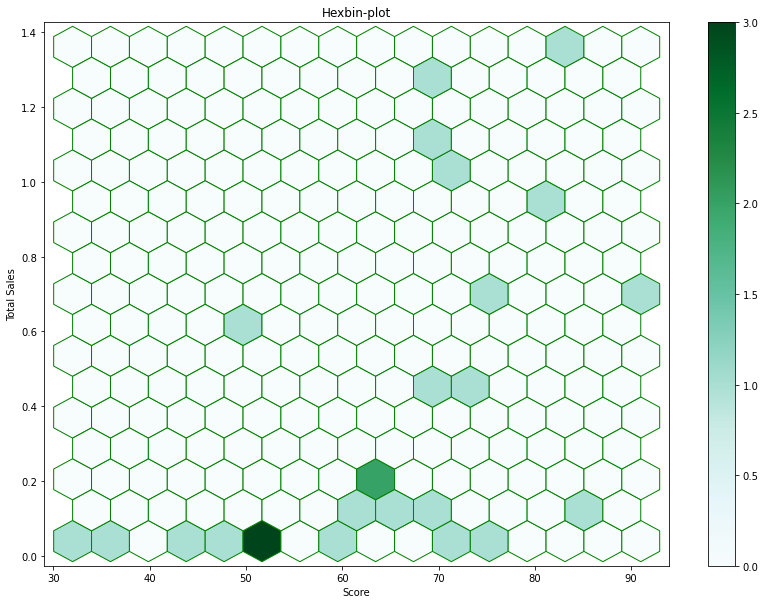

Weak correlation between professional reviews and X360 revenues.


In [41]:
top_platforms = ['PS3', 'PS4', 'X360']
critics= ['user_score_new', 'critic_score']

for platform in top_platforms:
    for critic in critics:
        score_effect_sales (platform, critic)
    

As we saw for PS4, the correlation between reviews of any kind to the revenues of the top platforms is weak. The reviews have, if all, minimum effect on the revenues of the games on the different platforms. 

So, if we are a gaming company, we shouldn't worry about bad reviews, but instead, invest just in good marketing. Interesting. 

**Task 8:** 

**Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?**

First, let's create the right data set. 

In [42]:
game_genre = data_2014[['genre', 'total_sales']]
grouped_game_genre= game_genre.groupby('genre').sum().sort_values(by='total_sales').reset_index()
grouped_game_genre

,genre,total_sales
0,Puzzle,2.21
1,Strategy,3.96
2,Simulation,13.13
3,Adventure,17.55
4,Platform,18.09
5,Racing,27.52
6,Fighting,28.22
7,Misc,37.55
8,Role-Playing,101.44
9,Sports,109.48


To build the distribution we will use the z_score method that we used earlier. 🙌

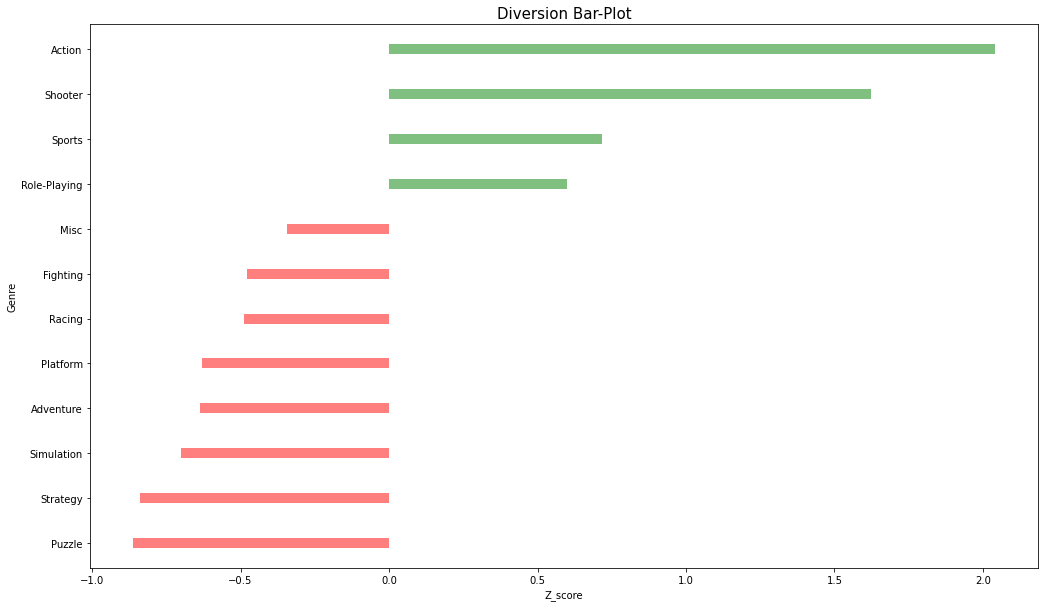

In [43]:
grouped_game_genre['z_score'] = (grouped_game_genre['total_sales'] - grouped_game_genre['total_sales'].mean())/grouped_game_genre['total_sales'].std()
grouped_game_genre['color']= ['red' if x<0 else 'green' for x in grouped_game_genre['z_score']]

fig, ax = plt.subplots(figsize = (17,10))

ax.set_title('Diversion Bar-Plot', fontdict= {'size':15})

ax.set_ylabel('Genre')

ax.set_xlabel('Z_score')

plt.hlines(y= grouped_game_genre['genre'], xmax = grouped_game_genre['z_score'], 
          xmin= 0, color=grouped_game_genre['color'], alpha= 0.5, linewidth= 10  )
plt.show()

Now let's check also the average (median) sales per genre.

In [44]:
grouped_game_genre_mean= game_genre.groupby('genre').median().sort_values(by='total_sales').reset_index()
grouped_game_genre_mean

,genre,total_sales
0,Adventure,0.030
1,Puzzle,0.045
2,Strategy,0.060
3,Action,0.090
4,Misc,0.090
5,Racing,0.090
6,Simulation,0.100
7,Role-Playing,0.110
8,Fighting,0.125
9,Platform,0.140


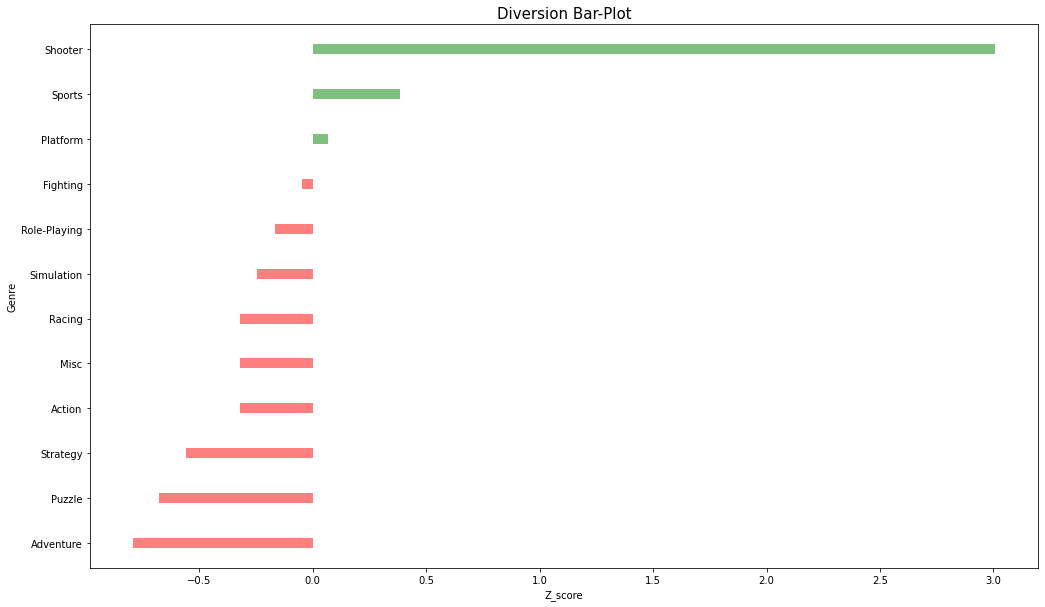

In [45]:
grouped_game_genre_mean['z_score'] = (grouped_game_genre_mean['total_sales'] - grouped_game_genre_mean['total_sales'].mean())/grouped_game_genre_mean['total_sales'].std()
grouped_game_genre_mean['color']= ['red' if x<0 else 'green' for x in grouped_game_genre_mean['z_score']]

fig, ax = plt.subplots(figsize = (17,10))

ax.set_title('Diversion Bar-Plot', fontdict= {'size':15})

ax.set_ylabel('Genre')

ax.set_xlabel('Z_score')

plt.hlines(y= grouped_game_genre_mean['genre'], xmax = grouped_game_genre_mean['z_score'], 
          xmin= 0, color=grouped_game_genre_mean['color'], alpha= 0.5, linewidth= 10  )
plt.show()

Interesting.

In the first graph, the Action genre is the leader but in the second graph, it's the Shooter genre. Seems that the Shooter and Sports genres are the safest genres to invest advertising in. The median sales of the Action genre are very far away from the average median sales - quite risky.

**Summary**

This stage included an in-depth analysis of the data. We found some interesting conclusions:

1. In the first half of the 90s games were not so popular, and only after 1994 did the number of released games starts to increase significantly when the peak was in 2008. After 2008, there is a decrease in the number of released games, probably due to the big financial crisis that happen in 2008.


2. The average life cycle of the platforms is around 10 years when they are starting to die about 5 years after they were released. 


3. We found that X360, PS3, Wii, and PS4 have the best revenues among all platforms.


5. The correlation between reviews of any kind to the revenues of the top platforms is weak. The reviews have, if all, minimum effect on the revenues of the games on the different platforms.


6. Seems that games that increase the adrenalin in the blood, sales more. All the other games, which belongs to more 'calm', don't succeed so well in sales.

### Creating a user profile for each region

NA Region

*Top 5 platforms*
***

In [46]:
na = data_2014.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending= False).head()
na

,platform,na_sales
3,PS4,98.61
9,XOne,81.27
8,X360,28.30
0,3DS,22.64
2,PS3,22.05


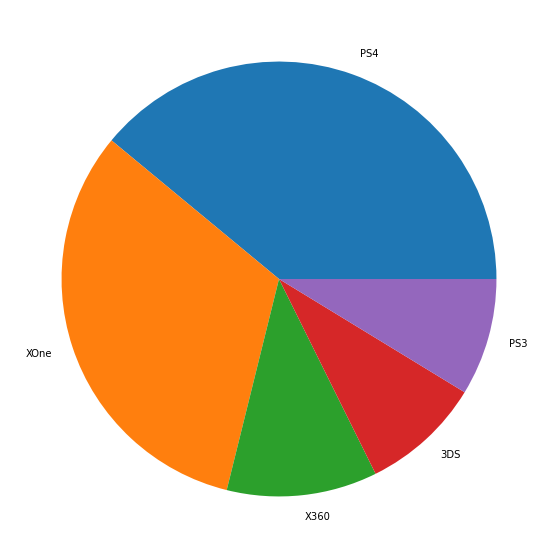

In [47]:
fig, ax = plt.subplots(figsize = (17,10))
plt.pie(na['na_sales'], labels = na['platform'])
plt.show()

As we can see, in North America the PS4 platform is the king of the market, while Xone is right behind. 
We see that the X360, 3DS, and PS3 platforms have almost the same share of sales.

*Top 5 genres*
***

In [48]:
na_genre = data_2014.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending= False).head()
na_genre

,genre,na_sales
8,Shooter,79.02
0,Action,72.53
10,Sports,46.13
7,Role-Playing,33.47
3,Misc,15.05


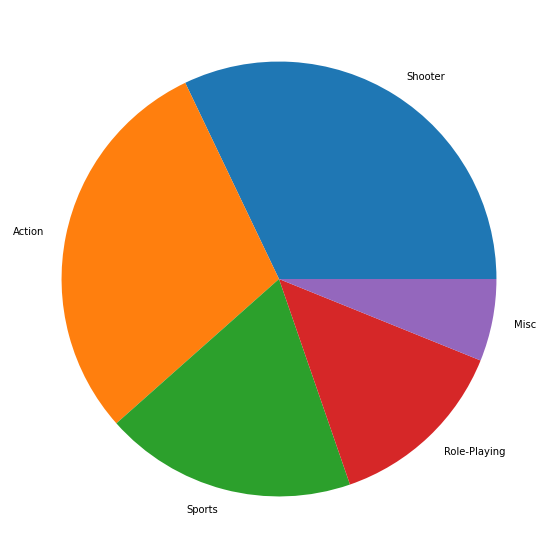

In [49]:
fig, ax = plt.subplots(figsize = (17,10))
plt.pie(na_genre['na_sales'], labels = na_genre['genre'])
plt.show()

We see that most of the North American people love Shooter games when action and Sports are right behind. The Misc genre is the smallest among the top five.

*ESRB (rating)*
***

In [50]:
na_rating = data_2014.groupby('rating_new')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending= False)
na_rating

,rating_new,na_sales
2,M,96.42
4,unknown,64.72
0,E,50.74
3,T,38.95
1,E10+,33.23


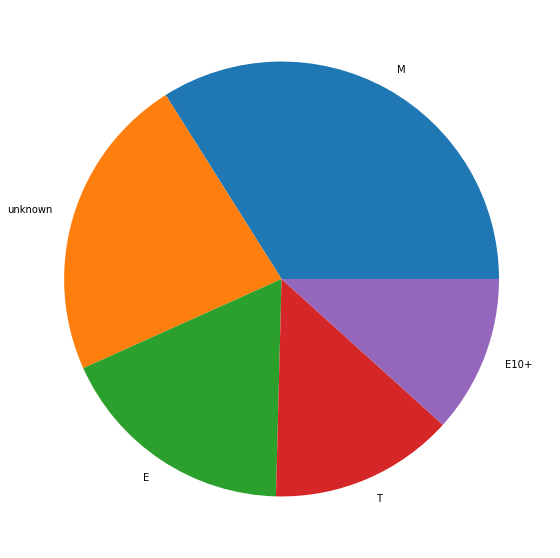

In [51]:
fig, ax = plt.subplots(figsize = (17,10))
plt.pie(na_rating['na_sales'], labels = na_rating['rating_new'])
plt.show()

We see that the games that got the rating M have the biggest sales and after them games that their rating is unknown. The E, T, and E+10 have almost the same shares of the market.  

EU Region

*Top 5 platforms*
***

In [52]:
eu = data_2014.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending= False).head()
eu

,platform,eu_sales
3,PS4,130.04
9,XOne,46.25
2,PS3,25.54
1,PC,17.97
0,3DS,16.12


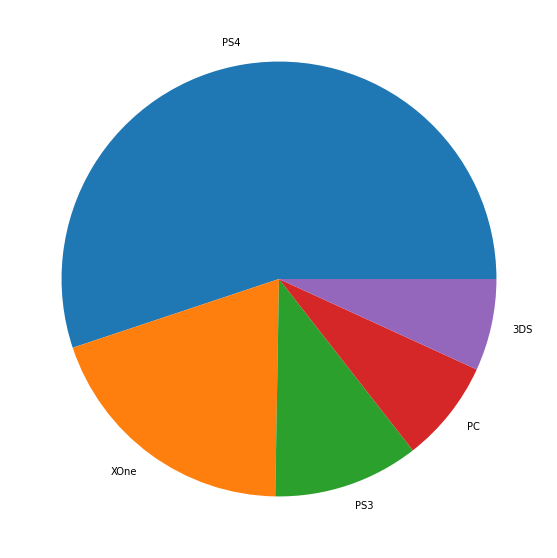

In [53]:
fig, ax = plt.subplots(figsize = (17,10))
plt.pie(eu['eu_sales'], labels = eu['platform'])
plt.show()

In Europe, we see that PS4 obtained more than half of the market. Then it's the Xone platform when PS3, PC, and 3DS have almost the same shares of the sales, which are significantly smaller.

*Top 5 genres*
***

In [54]:
eu_genre = data_2014.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending= False).head()
eu_genre

,genre,eu_sales
0,Action,74.68
8,Shooter,65.52
10,Sports,45.73
7,Role-Playing,28.17
6,Racing,14.13


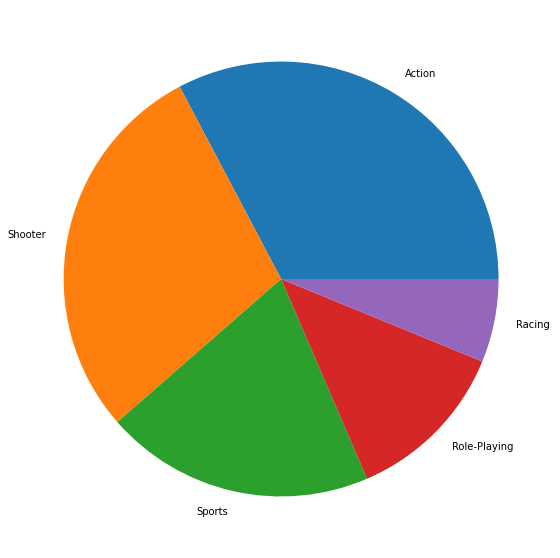

In [55]:
fig, ax = plt.subplots(figsize = (17,10))
plt.pie(eu_genre['eu_sales'], labels = eu_genre['genre'])
plt.show()

In Europe the genres Action and Shooter share the European popularity - they have almost the same amount of sales shares. After that comes the Sports genre, when Racing has the smallest share.   

*ESRB (rating)*
***

In [56]:
eu_rating = data_2014.groupby('rating_new')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending= False)
eu_rating

,rating_new,eu_sales
2,M,93.44
4,unknown,58.95
0,E,58.06
3,T,34.07
1,E10+,26.16


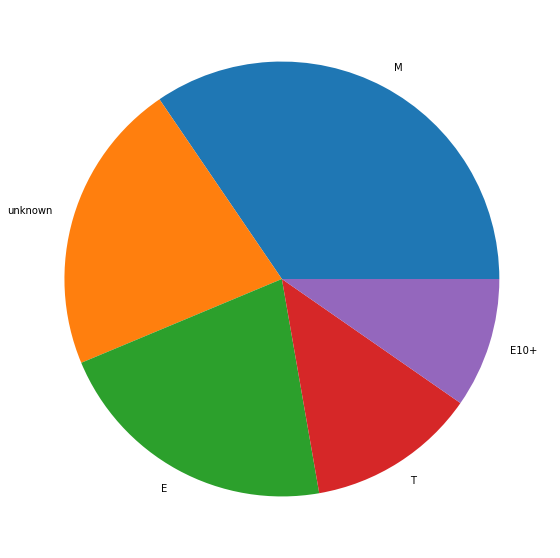

In [57]:
fig, ax = plt.subplots(figsize = (17,10))
plt.pie(eu_rating['eu_sales'], labels = eu_rating['rating_new'])
plt.show()

We see that in Europe the popularity of the genres is the same as in North America. Here we also have many games that their rating is unknown.

JP - Region

*Top 5 platforms*
***

In [58]:
jp = data_2014.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending= False).head()
jp

,platform,jp_sales
0,3DS,44.24
3,PS4,15.02
5,PSV,14.54
2,PS3,11.22
7,WiiU,7.31


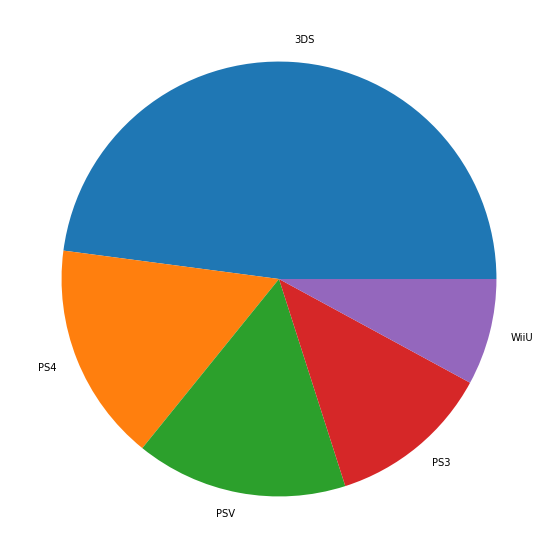

In [59]:
fig, ax = plt.subplots(figsize = (17,10))
plt.pie(jp['jp_sales'], labels = jp['platform'])
plt.show()

In Japan, the 3Ds platform controls almost half the market, when PS4 and PSV come after and has the same shares, and then PS3 and Wii.  

*Top 5 genres*
***

In [60]:
jp_genre = data_2014.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending= False).head()
jp_genre

,genre,jp_sales
7,Role-Playing,31.16
0,Action,29.58
2,Fighting,6.37
3,Misc,5.61
8,Shooter,4.87


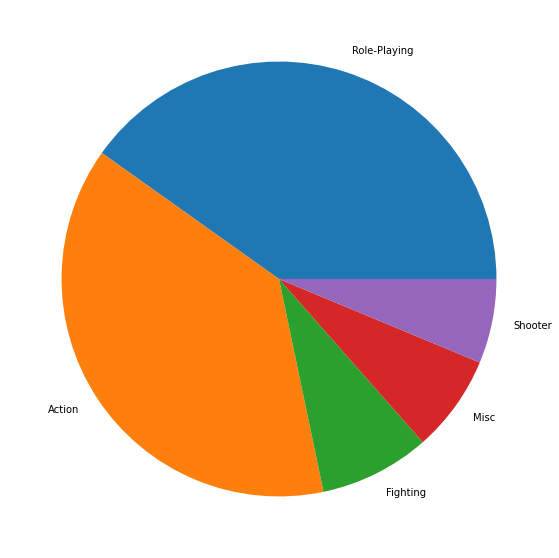

In [61]:
fig, ax = plt.subplots(figsize = (17,10))
plt.pie(jp_genre['jp_sales'], labels = jp_genre['genre'])
plt.show()

In Japan, the 2 most popular genres are Role-Playing and Action. After that comes Fighting, Misc, and Shooter, which have almost the same shares in sales.

*ESRB (rating)*
***

In [62]:
jp_rating = data_2014.groupby('rating_new')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending= False)
jp_rating

,rating_new,jp_sales
4,unknown,56.90
3,T,14.78
0,E,8.94
2,M,8.01
1,E10+,4.46


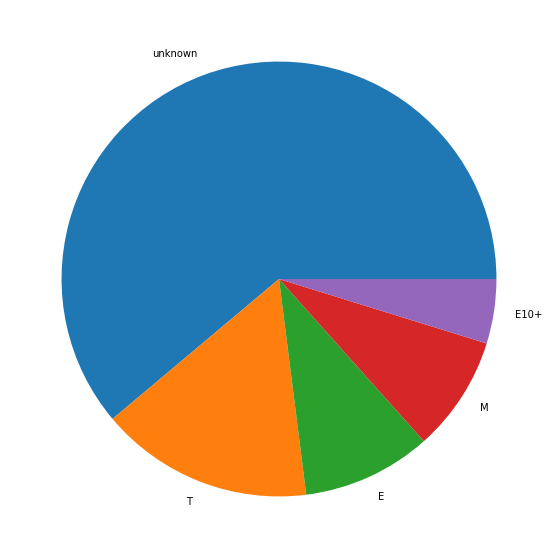

In [63]:
fig, ax = plt.subplots(figsize = (17,10))
plt.pie(jp_rating['jp_sales'], labels = jp_rating['rating_new'])
plt.show()

Wow! In Japan, the rating of most of the games is unknown - bummer.

**Summary**

We saw that the NA and EU regions have similar behavior and consumption patterns. For example:
1. **Platforms** - in both regions there are 4 leading platforms that are most profitable
* PS4
* Xone
* PS3
* 3DS


2. **Genres** - in both regions there are 4 leading genres:
* Action
* Sports
* Shooter
* Role-Playing

3. **ESRB (rating)** - in both regions the ratings are the same:
* M
* Unknown
* E
* T
* E+10

In both regions, the rating of many games is unknown.

While in Japan the outputs are a little bit different. 
1. **Platforms** - in Japan, there are 2 platforms that weren't in the other two continents:
* WiiU
* PSV

2. **Genres** - in Japan the leading genre is role-playing when only 2 genres of the top five in NA and EU regions are also in Japan:
* Action
* Shooter

3. **ESRB (rating)** - in Japan the rating is different than the other two continents:
* Unknown
* T
* E
* M
* E+10

The rating of most of the games that were sold in Japan is unknown.

### Testing the following hypotheses

First, let's build a function that tests the hypotheses so we can apply it to both hypotheses. The function first will check if the variance of the two samples is the same, set the right term, and only then will check the hypothesis. 

**Alpha:** We will set alpha=0.05 as it is a golden standard, and it's good enough for our case. In medicine value of alpha=0.01 is acceptable, but we are not testing medical issues so alpha=0.05 will be enough for us.

In [64]:
def t_test(sample_1,sample_2,alpha= 0.05):
    
    stat, p = levene (sample_1, sample_2)
    
    if p < alpha:
        option_var=False
    else:
        option_var=True
        
    p_value=st.ttest_ind(sample_1, sample_2, nan_policy = 'omit', equal_var=option_var).pvalue
    print(p_value)
    
    if p_value < alpha:
        print('Reject H0: average of sample 1 is not equal to average of sample 2')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 \
  and sample 2 are not the same") 

**Hypotesis 1: Average user ratings of the Xbox One and PC platforms are the same**

We will now set the hypotheses. It is known that the Null hypothesis is always about the equality of the 2 average samples, so the hypothesis will be set this way:

* **H0**: The average user ratings of the Xbox One and PC platforms are the same

* **H1**: The average user ratings of the Xbox One and PC platforms are differ

Let's find the 2 samples:
* User ratings of the Xbox One
* User ratings of PC

In [65]:
sample_1 = data_2014[data_2014['platform'] == 'XOne']['user_score_new']
sample_1 = np.floor(pd.to_numeric(sample_1, errors='coerce')).astype(float)

sample_2= data_2014[data_2014['platform'] == 'PC']['user_score_new']
sample_2 = np.floor(pd.to_numeric(sample_2, errors='coerce')).astype(float)

And now let's apply the function that we built.

In [66]:
t_test(sample_1,sample_2,alpha= 0.05)

0.04030495318270187
Reject H0: average of sample 1 is not equal to average of sample 2


**Hypotesis 2: Average user ratings for the Action and Sports genres are different**

* **H0**: The average user ratings for the Action and Sports genres are the same

* **H1**: The average user ratings for the Action and Sports genres are the differ

Let's find the 2 samples:
* User ratings for the Action genre
* User ratings for the sports genre

In [67]:
sample_1 = data_2014[data_2014['genre'] == 'Action']['user_score_new']
sample_1 = np.floor(pd.to_numeric(sample_1, errors='coerce')).astype(float)

sample_2= data_2014[data_2014['genre'] == 'Sports']['user_score_new']
sample_2 = np.floor(pd.to_numeric(sample_2, errors='coerce')).astype(float)

In [68]:
t_test(sample_1,sample_2,alpha= 0.05)

2.129956218842489e-17
Reject H0: average of sample 1 is not equal to average of sample 2


**Summary**

We rejected H0 in both of the hypotheses. Therefore, we don't accept the first hypothesis and do accept the second hypothesis.

### General conclusion

The advertising campaigns should focus on the following platforms in all 3 regions:
* PS4
* PS3
* 3DS
* Xone

To make the campaigns more accurate, the top genres that have the greatest amount of sales in all 3 regions are:
* Shooter
* Action
* Role-Playing

Therefore, we would recommend the store to direct the resources of the advertising campaign on games in the PS4, PS3, 3DS, and Xone platforms that belong to Shooter, Action, and Role-Playing genres.


Biana.